In [1]:
import keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import *
from keras.activations import *
from keras.optimizers import *
from keras.activations import *
from keras.layers.core import Reshape
from keras.callbacks import EarlyStopping


In [3]:
import seaborn as sns
import sklearn
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [4]:
import os 
from os import listdir
from tqdm import tqdm
import shutil
import cv2

import keras 
from keras import Model
from tensorflow.keras import backend as K
from keras.models import Sequential
from keras.utils import np_utils, to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, LearningRateScheduler

from math import *

from tensorflow.keras.models import load_model

In [7]:
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [14]:
# Directories
benign_source_dir = './augmented/benign'
malignant_source_dir = './augmented/malignant'

benign_target_dir = './dataset_reduced/benign'
malignant_target_dir = './dataset_reduced/malignant'

# Create target directories if they don't exist
os.makedirs(benign_target_dir, exist_ok=True)
os.makedirs(malignant_target_dir, exist_ok=True)

# Get all images from source directories
benign_images = getListOfFiles(benign_source_dir)
malignant_images = getListOfFiles(malignant_source_dir)

# Select 500 images from each category
benign_images = benign_images[:500]
malignant_images = malignant_images[:500]

# Copy benign images to target directory
for img_path in benign_images:
    shutil.copy(img_path, benign_target_dir)

# Copy malignant images to target directory
for img_path in malignant_images:
    shutil.copy(img_path, malignant_target_dir)

In [8]:
benign_images = getListOfFiles('./dataset_reduced/benign')
malignent_images = getListOfFiles('./dataset_reduced/malignant')

In [5]:
size=128

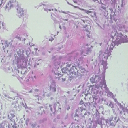

In [9]:
tf.keras.utils.load_img(benign_images[10], target_size=(size,size,1), grayscale=False)

In [10]:
total_images = len(benign_images) + len(malignent_images)
total_images

1000

In [11]:
data = pd.DataFrame(index=np.arange(0, len(benign_images)+len(malignent_images)), columns=["image", "target"])
k=0
for c in [0,1]:
        if c==1:
            for m in range(len(benign_images)):
                data.iloc[k]["image"] = benign_images[m]
                data.iloc[k]["target"] = 0
                k += 1
        else:
            for m in range(len(malignent_images)):
                data.iloc[k]["image"] = malignent_images[m]
                data.iloc[k]["target"] = 1
                k += 1
print(data.shape)
print(data.head())

(1000, 2)
                                               image target
0  ./dataset_reduced/malignant\SOB_M_DC-14-10926-...      1
1  ./dataset_reduced/malignant\SOB_M_DC-14-10926-...      1
2  ./dataset_reduced/malignant\SOB_M_DC-14-10926-...      1
3  ./dataset_reduced/malignant\SOB_M_DC-14-10926-...      1
4  ./dataset_reduced/malignant\SOB_M_DC-14-10926-...      1


In [12]:
count_data = data["target"].value_counts()
count_data

target
1    500
0    500
Name: count, dtype: int64

In [13]:
kf = KFold(n_splits=10,random_state=42, shuffle=True)
kf

KFold(n_splits=10, random_state=42, shuffle=True)

In [16]:
# Load and process the images
train_image = []
y = []

for img_path in tqdm(benign_images + malignent_images):
    label = 0 if img_path in benign_images else 1
    img = tf.keras.utils.load_img(img_path, target_size=(size, size))
    img = tf.keras.utils.img_to_array(img)
    img = img / 255.0  # Normalize the image
    train_image.append(img)
    y.append(label)

# Convert to numpy arrays
X = np.array(train_image)
y = np.array(y)

# Split data into training, testing, and validation sets using KFold
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

for train_index, test_index in kf.split(X_test, y_test):
    X2_test, X_val, y2_test, y_val = X_test[train_index], X_test[test_index], y_test[train_index], y_test[test_index]

# One-hot encode labels
Y_train = to_categorical(y_train, 2)
Y_test = to_categorical(y2_test, 2)
Y_val = to_categorical(y_val, 2)

# Print dataset shapes
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X2_test.shape)

100%|██████████| 1000/1000 [01:00<00:00, 16.40it/s]


Training set: (800, 128, 128, 3)
Validation set: (40, 128, 128, 3)
Test set: (160, 128, 128, 3)


In [17]:
my_input= Input(shape=(size, size, 3))
img_shape= (size, size, 3)

In [18]:
data_gen = ImageDataGenerator(
        zoom_range=1.2,  # set range for random zoom
        rotation_range = 90,
        width_shift_range=0.5,
        height_shift_range=0.5,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
    )

In [19]:
data_gen.fit(X_train)
X_train.shape[0]
data_gen.fit(X_val)
X_val.shape[0]
data_gen.fit(X2_test)
X2_test.shape[0]

160

In [20]:
import GPUtil

# Get the first GPU in the system
gpu = GPUtil.getGPUs()[0]

print(f"GPU Memory Total: {gpu.memoryTotal}MB")
print(f"GPU Memory Free: {gpu.memoryFree}MB")
print(f"GPU Memory Used: {gpu.memoryUsed}MB")
print(f"Temp: {gpu.temperature}")

GPU Memory Total: 4096.0MB
GPU Memory Free: 3747.0MB
GPU Memory Used: 202.0MB
Temp: 52.0


In [22]:
from keras.callbacks import EarlyStopping

In [23]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',      # Metric to monitor
    patience=5,              # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored metric
)

# Define the Learning Rate Scheduler callback
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)  # Example: decay learning rate by a factor of e^(-0.1) every epoch

learning_rate_scheduler = LearningRateScheduler(scheduler)


In [24]:
# Check GPU availability
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

# Set TensorFlow to use GPU devices
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the first GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
         
        # Enable memory growth
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is ready")
    except RuntimeError as e:
        print(e)

In [25]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, multiply
from tensorflow.keras import backend as K

In [26]:
from tensorflow.keras.utils import to_categorical

# Assuming binary classification (adjust 2 if you have more classes)
Y_train = to_categorical(Y_train, 2)
Y_val = to_categorical(Y_val, 2)

In [ ]:
from tensorflow.keras.models import load_model

resnet_model = load_model('resnet_model.h5')

In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Multiply, Reshape
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

def squeeze_excite_block(input_tensor, ratio=16):
    filters = input_tensor.shape[-1]
    se_shape = (1, 1, filters)
    
    x = GlobalAveragePooling2D()(input_tensor)
    x = Reshape((1, 1, filters))(x)
    x = Dense(filters // ratio, activation='relu')(x)
    x = Dense(filters, activation='sigmoid')(x)
    
    x = Multiply()([input_tensor, x])
    return x

IMG_HEIGHT, IMG_WIDTH = 128, 128
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

x = base_model.output

x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze more layers
for layer in base_model.layers[:-30]:
    layer.trainable = True

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

In [34]:


# Define your training data and parameters
# Replace `train_images`, `train_labels`, `val_images`, and `val_labels` with your actual data
history = model.fit(
    data_gen.flow(X_train, Y_train, batch_size=32),
    epochs=20,     # Number of epochs
    batch_size=32, # Batch size
    validation_data=(X_val, Y_val),  # Validation data
    callbacks=[early_stopping, learning_rate_scheduler]
)

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'binary_crossentropy/remove_squeezable_dimensions/Squeeze' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "d:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "d:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "d:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "d:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "d:\Anaconda\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "d:\Anaconda\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "d:\Anaconda\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "d:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "d:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "d:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "d:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "d:\Anaconda\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "d:\Anaconda\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "d:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "d:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "d:\Anaconda\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "d:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "d:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "d:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Jack Kevin\AppData\Local\Temp\ipykernel_15108\799040755.py", line 3, in <module>
      history = model.fit(
    File "d:\Anaconda\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "d:\Anaconda\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "d:\Anaconda\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "d:\Anaconda\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Anaconda\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "d:\Anaconda\Lib\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "d:\Anaconda\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "d:\Anaconda\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "d:\Anaconda\Lib\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "d:\Anaconda\Lib\site-packages\keras\losses.py", line 261, in call
      y_pred, y_true = losses_utils.squeeze_or_expand_dimensions(
    File "d:\Anaconda\Lib\site-packages\keras\utils\losses_utils.py", line 200, in squeeze_or_expand_dimensions
      y_true, y_pred = remove_squeezable_dimensions(y_true, y_pred)
    File "d:\Anaconda\Lib\site-packages\keras\utils\losses_utils.py", line 139, in remove_squeezable_dimensions
      labels = tf.squeeze(labels, [-1])
Node: 'binary_crossentropy/remove_squeezable_dimensions/Squeeze'
Can not squeeze dim[2], expected a dimension of 1, got 2
	 [[{{node binary_crossentropy/remove_squeezable_dimensions/Squeeze}}]] [Op:__inference_train_function_84435]